# Bosch EDA - Response 1 vs 0
ターゲット変数1, 0の違いによるデータの差が無いか色々見てみるEDA。
特に、

- Response == 1の時に固有のパターンは無いか
- Response == 1の出方に偏りは無いか
    - 不良品は連続する、とか
    - 特定の曜日に不良が続く、とか

あたりを掘り下げる。

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_num = pd.read_csv("../input/train_numeric.csv", index_col=0, nrows=100000)

fail = df_num[df_num.Response == 1]
ok = df_num[df_num.Response == 0]

fail.to_csv('fail_head100k.csv') # 不良の数は少ないので、別途Excelで全件眺める

df_date = pd.read_csv('../input/train_date.csv', index_col=0, nrows=100000)

## 全体の傾向

In [10]:
fail.describe()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,14.0,14.0,14.0,14.0,14.000000,24.000000,24.0,24.0,24.0,568.0
mean,0.000969,0.001076,-0.022221,-0.021572,0.002434,-0.011207,-0.000745,-0.003586,-0.008610,-0.005893,...,0.0,0.0,0.0,0.0,0.071429,-0.000042,0.0,0.0,0.0,1.0
std,0.072820,0.081744,0.194006,0.196250,0.095795,0.169366,0.017877,0.097347,0.114784,0.109608,...,0.0,0.0,0.0,0.0,0.248623,0.000204,0.0,0.0,0.0,0.0
min,-0.232000,-0.272000,-0.379000,-0.379000,-0.360000,-0.521000,-0.044000,-0.232000,-0.286000,-0.329000,...,0.0,0.0,0.0,0.0,-0.250000,-0.001000,0.0,0.0,0.0,1.0
25%,-0.036000,-0.049000,-0.179000,-0.179000,-0.056000,-0.112000,-0.015000,-0.072000,-0.092000,-0.086750,...,0.0,0.0,0.0,0.0,-0.250000,0.000000,0.0,0.0,0.0,1.0
50%,0.003000,0.004000,-0.033000,-0.034000,0.031000,0.025000,0.000000,-0.032000,-0.005000,-0.000500,...,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,1.0
75%,0.043000,0.056000,0.003000,0.003000,0.074000,0.116000,0.015000,0.048000,0.066000,0.067000,...,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,1.0
max,0.226000,0.250000,0.367000,0.366000,0.248000,0.206000,0.059000,0.368000,0.296000,0.430000,...,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,1.0


In [11]:
ok.describe()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
count,57625.000000,57625.000000,57625.000000,57625.000000,57625.000000,57625.000000,57625.000000,57625.000000,57625.00000,57625.000000,...,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,5171.000000,5171.000000,5171.000000,5171.000000,99432.0
mean,-0.001844,-0.002575,0.000018,-0.000017,0.001013,0.003915,0.000341,0.002141,-0.00143,-0.000926,...,-0.000003,0.000014,0.000471,0.000154,0.002264,-0.000009,0.000392,0.000490,0.000064,0.0
std,0.080422,0.093156,0.211186,0.211341,0.093139,0.161735,0.019368,0.104159,0.11544,0.113331,...,0.000055,0.000248,0.017925,0.001880,0.250037,0.000094,0.019665,0.012083,0.001178,0.0
min,-0.402000,-0.474000,-0.397000,-0.416000,-0.404000,-0.566000,-0.044000,-0.232000,-0.39300,-0.415000,...,-0.001000,0.000000,0.000000,0.000000,-0.250000,-0.001000,0.000000,0.000000,0.000000,0.0
25%,-0.055000,-0.064000,-0.179000,-0.179000,-0.056000,-0.066000,-0.015000,-0.072000,-0.08200,-0.078000,...,0.000000,0.000000,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.003000,0.004000,-0.033000,-0.034000,0.031000,0.070000,0.000000,-0.032000,0.00000,0.002000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.056000,0.063000,0.294000,0.294000,0.074000,0.116000,0.015000,0.088000,0.07600,0.077000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.278000,0.280000,0.567000,0.566000,0.422000,0.388000,0.096000,0.528000,0.46900,0.537000,...,0.000000,0.009000,0.900000,0.045000,0.250000,0.000000,1.000000,0.441000,0.046000,0.0


多少の傾向はある気がするが、fail側のデータが少ないので何とも言えず。

## 不良品の出現パターン
1つ目は単純なrolling-mean。2つ目はお互いの平均区間が重複しないように間引いているもの。
2つ目がランダムウォークっぽいかどうか見たかったが、これは微妙そう。（本当は単位根検定にかける所なんだろうか？）

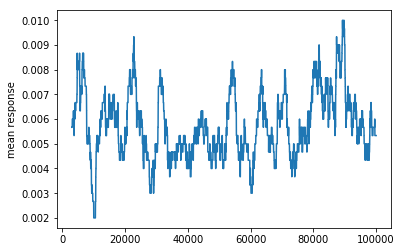

In [12]:
sample_freq = 3000

mean_response = df_num[['Response']].rolling(sample_freq).mean().reset_index(drop=True)
plt.plot(mean_response)
plt.ylabel('mean response')
plt.show()

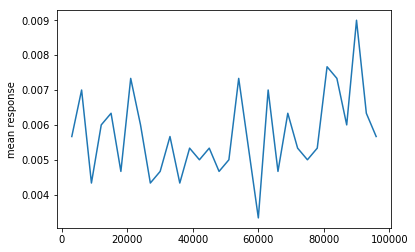

In [13]:
plt.plot(mean_response.iloc[[i*sample_freq for i in range(df_num.shape[0]//sample_freq)]])
plt.ylabel('mean response')
plt.show()

続いて、「不良は連続して起きる」仮説を検証してみる。

In [14]:
fail.reset_index(inplace=True)
fail['diff'] = fail['Id'] - fail['Id'].shift(1) # 次のNGまでのIdの差
fail['diff'].value_counts().reset_index().head(20)

C:\Users\noumi\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,diff
0,1.0,22
1,57.0,5
2,96.0,4
3,140.0,4
4,35.0,4
5,59.0,4
6,454.0,4
7,104.0,3
8,108.0,3
9,329.0,3


diff == 1、つまり連続して発生しているパターンが多い。行ごとに独立な試行の結果だとすると、diff==2や3も上位に来るはず（ポアソン分布？）だがそうなっていない事、そもそも不良が全体の0.5%しか無いことから考えると、**明らかに「続けて失敗する可能性が高い」ことは言えそう**。

## 特徴量への組み込み
「直前の行で失敗していたかどうか」を表す特徴を作ってみる。train/testをくっつけてIdでソート。

In [15]:
df_id_all = pd.concat([pd.read_csv('../input/train_numeric.csv', usecols=[0,969]), 
                       pd.read_csv('../input/test_numeric.csv', usecols=[0])])
df_id_all.sort_values(by='Id', inplace=True)

df_id_all['prev_failed'] = df_id_all.Response.shift(1) == 1.0
df_id_all.prev_failed.value_counts()

False    2360616
True        6879
Name: prev_failed, dtype: int64

In [16]:
print(df_id_all[df_id_all.prev_failed == 1].Response.mean())
print(df_id_all[df_id_all.prev_failed == 0].Response.mean())

0.10081823495032145
0.00553576345498062


全体では0.5%程度しか失敗が無いのに、直前が失敗している場合は10％程度NGになる！これはかなり強力な特徴。

In [17]:
df_id_all.reset_index(drop=True, inplace=True)
df_id_all[['Id','prev_failed']].to_feather('prev_failed.f') # 要pip install -U feather-format

## データ内容の一致
CSVで眺めていると、連番で失敗しているものは各列の値まで一致しているっぽい。
列の値が一致しているかどうかを特徴に加えてみる（ここでは近似的に、行方向のsumが一致しているかどうかで判断）

In [18]:
sum_num = df_num.drop('Response',axis=1).sum(axis=1).reset_index()
sum_num.columns = ['Id','mean_num']

In [64]:
tmp = pd.merge(df_num.reset_index(), sum_num, on='Id', how='left')
tmp['mean_num_diff_n'] = tmp['mean_num'] - tmp['mean_num'].shift(-b1)
tmp['next_failed'] = tmp['Response'].shift(-1) == 1.0

列が一致しただけだと5%の不良率（それでも平均の１０倍！）

In [65]:
tmp[tmp.mean_num_diff_n==0.0].Response.mean()

0.05124521072796935

In [66]:
tmp[tmp.next_failed == True].Response.mean()

0.045774647887323945

先ほどの特徴と組み合わせると、何と**該当する92％が不良**となる

In [68]:
tmp[(tmp.next_failed == True) & (tmp.mean_num_diff_n == 0.0)].Response.mean()

0.92

この特徴を全データに対して計算しておく

In [19]:
print('train')
num_chunks = pd.read_csv("../input/train_numeric.csv", index_col=0,
                         usecols=list(range(969)), chunksize=100000, dtype=np.float32)

sum_train = pd.concat([nchunk.sum(axis=1).reset_index() for nchunk in num_chunks])
print('test')
num_chunks = pd.read_csv("../input/test_numeric.csv", index_col=0,
                         usecols=list(range(969)), chunksize=100000, dtype=np.float32)

sum_test = pd.concat([nchunk.sum(axis=1).reset_index() for nchunk in num_chunks])

sum_all = pd.concat([sum_train,sum_test])

train
test


In [24]:
sum_all.columns = ['Id', 'mean_num']
sum_all.reset_index(drop=True).to_feather('mean_num.f')

In [72]:
sum_all.sort_values(by='Id', inplace=True)

,Id,0
0,1.0,-1.366
1,2.0,-3.401
2,3.0,3.215
0,4.0,-3.215
3,5.0,-1.776


In [86]:
sum_all['same_to_prev'] = (sum_all['mean_num'] - sum_all['mean_num'].shift(1)) == 0.0
sum_all['same_to_next'] = (sum_all['mean_num'] - sum_all['mean_num'].shift(-1)) == 0.0
sum_all.head()

,Id,mean_num,mean_diff_p1,mean_diff_m1,same_to_prev,same_to_next
0,1.0,-1.366,NaN,2.035000,False,False
1,2.0,-3.401,-2.035000,-6.615999,False,False
2,3.0,3.215,6.615999,6.430000,False,False
0,4.0,-3.215,-6.430000,-1.439000,False,False
3,5.0,-1.776,1.439000,-2.227000,False,False


In [83]:
df_id_all = pd.concat([pd.read_csv('../input/train_numeric.csv', usecols=[0,969]), 
                       pd.read_csv('../input/test_numeric.csv', usecols=[0])])
df_id_all.sort_values(by='Id', inplace=True)

df_id_all['prev_failed'] = df_id_all.Response.shift(1) == 1.0
df_id_all['next_failed'] = df_id_all.Response.shift(-1) == 1.0

In [87]:
df_id_all = pd.merge(df_id_all, sum_all, on='Id', how='left')

In [90]:
df_id_all[(df_id_all.prev_failed)&(df_id_all.same_to_prev)].Response.mean()

0.25234375

In [91]:
df_id_all[(df_id_all.next_failed)&(df_id_all.same_to_next)].Response.mean()

0.8636363636363636

In [93]:
df_id_all.drop('Response', axis=1).to_feather('same_to_next_or_prev.f')

## 時間順にソート
ここまででId順での連番を見ていたが、ライン通過順に並び替えて同じことをやってみる

In [25]:
sum_all.head()

,Id,mean_num
0,4.0,-3.215
1,6.0,0.451
2,7.0,-0.130
3,9.0,-0.123
4,11.0,-1.453


In [26]:
y = pd.read_feather('y.f')
min_time = pd.read_feather('mintime.f')

In [32]:
sum_all['Response'] = y['Response']
sum_all['min_time'] = min_time['min_time']

In [41]:
sum_all.head()

,index,Id,mean_num,Response,min_time
0,0,4.0,-3.215,0.0,82.239998
1,1,6.0,0.451,0.0,1313.119995
2,2,7.0,-0.130,0.0,1618.699951
3,3,9.0,-0.123,0.0,1149.199951
4,4,11.0,-1.453,0.0,602.640015


In [43]:
sum_all.sort_values(by=['min_time','Id'],inplace=True)
sum_all.head()

,index,Id,mean_num,Response,min_time
1237785,1237785,107945.0,1.094,0.0,0.01
54038,54038,108193.0,0.646,0.0,0.01
154038,154038,307958.0,-0.188,0.0,0.01
1337785,1337785,308186.0,-0.574,0.0,0.01
1437785,1437785,507904.0,-3.639,0.0,0.01


In [45]:
sum_all['prev_failed_t'] = sum_all.Response.shift(1) == 1.0
sum_all['next_failed_t'] = sum_all.Response.shift(-1) == 1.0

In [50]:
sum_all['same_to_prev_t'] = (sum_all['mean_num'] - sum_all['mean_num'].shift(1)) == 0.0
sum_all['same_to_next_t'] = (sum_all['mean_num'] - sum_all['mean_num'].shift(-1)) == 0.0

In [51]:
sum_all[(sum_all.prev_failed_t)&(sum_all.same_to_prev_t)].Response.mean()

0.17289719

In [52]:
sum_all[(sum_all.next_failed_t)&(sum_all.same_to_next_t)].Response.mean()

0.84090906

In [54]:
sum_all[['Id','prev_failed_t','next_failed_t','same_to_prev_t','same_to_next_t']].reset_index().to_feather('same_to_next_or_prev_t.f')